# Taxonomy Classification and Quinone Analysis from Scientific Publications

ultimate goal of this project is to produce a master table containing metadata on formally described species and nature of quinones they produce.

In [ ]:
# allows for multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#importing necessary libraries
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_palette("rocket_r")
from lxml import etree
import time
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [ ]:
### check what to do with pubmedResults.txt file
# classify taxonomy of organisms based on species and genus names extracted.
# identify and analyze type and characteristics of quinones found in each species or genus.
# determine frequency of occurrence of each type of quinone in data set.
# identify relationships between types of quinones found and species or genus of organisms.
# look for patterns or trends in data that might indicate a relationship between length of quinone tail and species or genus of organism.
# create visualizations to better understand and communicate these patterns or relationships.
# based on these patterns or relationships, make predictions about types of quinones that might be found in other species or genus.
# use these predictions to guide further research or data collection.
# Feedback on your intermediate report:

# Please provide a title: 
    #Taxonomy Classification and Quinone Analysis from Scientific Publications: A Natural Language Processing Approach
# report is clear and fulfills requirements, but it contains many typos that should be corrected.

# There is no explicit related work section, and only one reference is given, this has to be strengthened.
# State of art - explain importance of work and relate it to how last real research done on this was from 1981 paper
# quinones are sometimes used as taxonomic markers - specific quiones can be link to specific species
# molecule that is a diagnostic for certain species
# look at relation same species order have same quinones

# There is a figure that reports experiments but no details are given. - explain to novice reader
# What was motivation and experimental conditions?
# Unique topic, computer science to improve field of biology
# biological context - info, importantance, understand of quinone distrubution lilited. info in journals, microbiology intrest in quinones, TIMC motivations - pathways oninone biosynthese, resparatory chains, qunone type breath different substrates, what conditions organism can grow and colonize. quinone and organism give a hint of what conditions are used to grow them

# team - charaterizing quinone pathways by identifying genes in production
# confront with team data - validate, discover new pathways? 
# figures to explain pathways, variants, etc.
# very expiremental work - plenty of surprises

# purpose is to extract all this uncollected quinone data and compare it to research, in a way validating journals and updating any new discoveries or information previously unknown.

# species -> quinones

# ANALYSIS
# Keyword Analysis:
#     Create a counter dictionary.
#     Update counter dictionary with quinones from data.
# Taxonomy Classification:
#     Utilize NCBI's API for taxonomy data to classify organisms based on species and genus names extracted.
# Quinone Length Analysis:
#     Extract length of quinone tail and add it to a new column in DataFrame.
#     Analyze variability in quinone chain lengths across different genera or orders.
# Visualization:
#     Create visualizations to represent statistics and relationships discovered in analysis.
# Statistics:
#     Calculate statistics on taxonomy distribution of organisms.
#     Analyze chains of quinones and identify patterns or trends.
#     Assess variability in quinone chain lengths across different genera or orders.
# Crosscheck Species/Genus Mentioned:
#     Match species/genus mentioned in title with abstract to find sentence where a specific species/genus was mentioned.
# Validate Quinone Information:
#     Look for articles related to a species and validate quinone information.
# Frequency of Quinones:
#     Determine frequency of occurrence for each type of quinone in dataset.
# Relationship Identification:
#     Identify relationships between types of quinones and species/genus of organisms.
#     Look for patterns or trends indicating a relationship between length of quinone tail and species/genus of organism.
# Visualization:
#     Create visualizations to understand and communicate identified patterns or relationships.
# Quinone Structure Study:
#     Use information about type of quinone and length of quinone tail to study structural diversity of quinones across different organisms.

## Mining PubMed files

In [ ]:
import os
import glob
import gzip
import csv
import time
from lxml import etree

journals = ['Antonie van Leeuwenhoek', 
            'International journal of systematic and evolutionary microbiology']

# folder path to the xml files
path = '/Users/suraj/Desktop/TIMC/TIMC-quinoneMining/pubmed-data'
xml_files = glob.glob(os.path.join(path, '*.xml.gz'))

# file_limit = 2  # set number of files to process
# xml_files = xml_files[:file_limit]  # apply file limit

start_time = time.time()  # start timing

count = 0  # counter for articles from two journals 

with open('csv/output1.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Journal Name', 'Year', 'Month', 'PubMedID', 'Title', 'Abstract'])

    for i, file_path in enumerate(xml_files):
        try:
            with gzip.open(file_path, 'rb') as f:
                content = f.read()
        except OSError as e:
            print(f"Error opening file: {file_path}. Reason: {str(e)}")
            continue

        try:
            root = etree.fromstring(content)
        except etree.XMLSyntaxError as e:
            print(f"Error parsing XML: {file_path}. Reason: {str(e)}")
            continue

        for article in root.xpath('.//PubmedArticle'):
            abstract_element = article.xpath('.//AbstractText')[0] if len(article.xpath('.//AbstractText')) > 0 else None
            journal_name_element = article.xpath('.//Journal/Title')[0] if len(article.xpath('.//Journal/Title')) > 0 else None

            if abstract_element is None or journal_name_element is None or journal_name_element.text not in journals:
                continue

            title = article.xpath('.//ArticleTitle/text()')[0] if len(article.xpath('.//ArticleTitle/text()')) > 0 else ''
            abstract = abstract_element.text if abstract_element is not None else ''
            pubmed_id = article.xpath('.//PMID/text()')[0] if len(article.xpath('.//PMID/text()')) > 0 else ''

            if not pubmed_id.isnumeric():
                print(f"Unexpected PubMedID in file: {file_path}. Skipping this record.")
                continue

            pub_date_element = article.xpath('.//PubDate')[0] if len(article.xpath('.//PubDate')) > 0 else None
            if pub_date_element is not None:
                pub_year = pub_date_element.xpath('.//Year/text()')[0] if len(pub_date_element.xpath('.//Year/text()')) > 0 else ''
                pub_month = pub_date_element.xpath('.//Month/text()')[0] if len(pub_date_element.xpath('.//Month/text()')) > 0 else ''
                #pub_date = f"{pub_year}-{pub_month}"
            else:
                pub_date = ''

            writer.writerow([journal_name_element.text, pub_year, pub_month, pubmed_id, title, abstract])
            count += 1  # increment counter

end_time = time.time()  # end timing

with open('mining-log.txt', 'w', newline='', encoding='utf-8') as f:
    print(f"Process took {end_time - start_time} seconds.")
    print(f"Total articles processed from specified journals: {count}")

In [ ]:
# use a log file to hold this:
print(f"process took {end_time - start_time} seconds.")
print(f"Total articles processed from specified journals: {count}")

## Extracting

In [27]:
# Import necessary libraries

import re
import pandas as pd
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter

# quinone dictionary
quinones = {
    "q": [r"\bquinone\b",r"\bquinone-{}\b", r"\bquinone {}\b", r"\bq{}\b", r"\bq-{}\b", r"q\({}\)",
          r"\b{},{}-benzoquinone\b",r"\b{},{}-bq\b", 
          r"\b{},{}-dimethyl-{},{}-benzoquinone\b",r"\b{},{}-dimethyl-{},{}-bq\b", r"\b{},{}-d-{},{}-benzoquinone\b",r"\b{},{}-d-{},{}-bq\b", 
          r"\b{}-methyl-{},{}-naphthoquinone\b", r"\b{}-methyl-{},{}-nq\b", r"\b{}-m-{},{}-naphthoquinone\b", r"\b{}-m-{},{}-nq\b",
          r"\b{},{}-dimethoxy-{},{}-naphthoquinone\b", r"\b{},{}-dimethoxy-{},{}-nq\b",r"\b{},{}-d-{},{}-naphthoquinone\b", r"\b{},{}-d-{},{}-nq\b",
          r"\b{},{},{},{}-tetramethyl-{},{}-benzoquinone\b", r"\b{},{},{},{}-tetramethyl-{},{}-bq\b", r"\b{},{},{},{}-t-{},{}-benzoquinone\b", r"\b{},{},{},{}-t-{},{}-bq\b", r"\bQ-{}H\({}\)\b"],
    "uq": [r"\bubiquinone\b", r"\bubiquinone {}\b", r"\bcoenzyme Q\b", r"\bcoQ\b", r"\b UQ \b", r"\bUbiquinone{}\b", r"\bCoenzyme Q{}\b", r"\bCoQ{}\b", r"\buq{}\b", r"\bcoQ{}\b", r"\bUQ{}\b", r"\bUbq{}\b", r"\bCoQ{}\b", r"\bCoQ{}\b", r"\bUQ{}\b", r"\bUQ{}H{}\b", r"\bubiquinone-{}\b", r"\bubiquinone-{}(H{})\b", r"\bUbiquinone-{}(H{})\b", r"\buq-{}\b", r"\buq{}H{}\b", r"\bUbq-{}\b", r"\bUbq{}(H{})\b", r"\(UQ\)-{}", r"\bUQ-{}H\({}\)\b"],
    "mk": [r"\bmenaquinone\b", r"\bmenaquinone {}\b", r"\bvitamin K2\b", r"\bvK2\b", r"\bMK{}\b", r"\bMK{}H{}\b", r"\bmenaquinone-{}\b", r"\bmenaquinone-{}(H{})\b", r"\bmk-{}\b", r"\bmk{}H{}\b", r"\(MK\)-{}", r"\(MQ-{}\)", r"mq-{}", r"mq\({}\)", r"\(MK\) {}", r"\bMK-{}H\({}\)\b"],
    "pq": [r"\bplastoquinone\b", r"\bPQ\b", r"\bplastoquinone-{}\b"],
    "rhq": [r"\brhodoquinone\b", r"\bRQ\b", r"\brhodoquinone-{}\b"],
    "caldq": [r"\bCaldariella quinone\b", r"\bCQ\b", r"\bCaldariellaquinone\b", r"\bcaldq\b"],
    "dmk": [r"\bdemethylmenaquinone\b", r"\bdemethyl-menaquinone\b", r"\bDMK\b", r"\bDMK-{}\b", r"\b{},{}-dimethyl-menaquinone\b", r"\b{},{}-DMMK\b", r"DMMK-{}", r"{}-DMMK", r"\bDMK-{}H\({}\)\b"],
    "mmk": [r"\bmethylmenaquinone\b", r"\bmethyl-menaquinone\b", r"\bMMK\b", r"MMK-{}" r"\b{}-methyl-menaquinone\b", r"\b{}-MMK\b"],
}

# regex patterns
# species_genus_pattern = re.compile(r"[A-Z][a-z]+\s(?:sp\.|var\.)?\s?[a-z]+(?:-[a-z]+)?(?:\s[a-z]+)?")
quinone_patterns = {key: [re.compile(term.format(*["(\d+)"] * term.count("{}")), re.IGNORECASE) for term in terms] for key, terms in quinones.items()}

# regex patterns
species_genus_pattern = re.compile(r"[A-Z][a-z]+\s(?:sp\.|var\.)?\s?[a-z]+(?:-[a-z]+)?")

# Function for Biological Entity Recognition using regular expressions
def recognize_biological_entities(text):
    if isinstance(text, str):
        entities = re.findall(r'\b(?:species|genus):\s*([a-zA-Z]+)\b', text)
        return entities
    else:
        return []
# Function to extract species and genus
def extract_species_genus(title):
    # Find all potential matches
    potential_matches = species_genus_pattern.findall(title)
    # Filter out matches that aren't Latin words
    matches = [match for match in potential_matches if match in recognize_biological_entities(title)]
    # Return a comma-separated string of matches
    return ", ".join(species_genus_pattern.findall(title))

def find_keyword_sentence(text, keyword):
    sentences = sent_tokenize(text)
    return "; ".join(sentence for sentence in sentences if keyword.lower() in sentence.lower())

# Precompile regex patterns
quinone_patterns = {key: [re.compile(term.format(*["(\d+)"] * term.count("{}")), re.IGNORECASE) for term in terms] for key, terms in quinones.items()}

def contains_quinone(row):
    matches = {}
    keyword_sentences = set()

    for quinone, patterns in quinone_patterns.items():
        for pattern in patterns:
            match_in_title = pattern.finditer(row["Title"])
            match_in_abstract = pattern.finditer(row["Abstract"])

            for match in match_in_title:
                if quinone not in matches:
                    matches[quinone] = []
                matches[quinone].append(match.group(0))

                keyword_sentence_title = find_keyword_sentence(row["Title"], match.group(0))
                if keyword_sentence_title:
                    keyword_sentences.add(keyword_sentence_title)

            for match in match_in_abstract:
                if quinone not in matches:
                    matches[quinone] = []
                matches[quinone].append(match.group(0))

                keyword_sentence_abstract = find_keyword_sentence(row["Abstract"], match.group(0))
                if keyword_sentence_abstract:
                    keyword_sentences.add(keyword_sentence_abstract)

    if matches:
        matches_str = ", ".join(f"'{i}': ({', '.join(map(str, matches[i]))})" for i in matches)
        return matches_str, "; ".join(keyword_sentences)
    else:
        return None, None


def extract_quinone_tail_length(sentence):
    if not isinstance(sentence, str):
        return None, None
    quinone_lengths = []
    for quinone in quinone_patterns:
        for pattern in quinone_patterns[quinone]:
            matches = pattern.findall(sentence)
            if matches:
                for match in matches:
                    quinone_length = re.findall(r'\d+', match)
                    if quinone_length:
                        quinone_lengths.append(int(quinone_length[0]))
    return quinone_lengths

def extract_hydrogen_loss(sentence):
    if not isinstance(sentence, str):
        return None
    hydrogen_loss = []
    # Patterns for "H(digit)" and "Hdigit" formats
    patterns = [re.compile(pattern) for pattern in [r"H\(\d+\)", r"H\d+"]]
    for pattern in patterns:
        matches = pattern.findall(sentence)
        if matches:
            for match in matches:
                hydrogen_loss.append(match)
    return hydrogen_loss if hydrogen_loss else None


def build_output_file(df, output_file_location):
    with open(output_file_location, "w+") as outputFile:
        for count, (index, row) in enumerate(df.iterrows(), start=1):
            outputFile.write(f"{count}.Journal: {row['Journal Name']}\n\tPubMedID: {row['PubMedID']}\n\tSpecies and Genus: {row['Species and Genus']}\n\tQuinone Found: {row['Quinone']}\n\t{row['Keyword Sentence']}\n\tQuinone Tail: {row['Tail']}\n\tHydrogen Saturation: {row['Hydrogen Saturation']}\n\n")

df = pd.read_csv("csv/output.csv")
df.fillna("", inplace=True)
df[["Quinone", "Keyword Sentence"]] = df.apply(contains_quinone, axis=1, result_type="expand")

# df with just quinone matches
df = df[(~df["Quinone"].isnull())]
df["Species and Genus"] = df["Title"].apply(extract_species_genus)
df['Keyword Sentence'].fillna("", inplace=True)
df['Tail'] = df['Keyword Sentence'].apply(extract_quinone_tail_length)
# add new column to dataframe for hydrogen loss
df['Hydrogen Saturation'] = df['Keyword Sentence'].apply(extract_hydrogen_loss)

df.info()
build_output_file(df, "quinoneResults/pubMedResults.txt")




<class 'pandas.core.frame.DataFrame'>
Int64Index: 3398 entries, 6 to 12205
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Journal Name         3398 non-null   object
 1   Year                 3398 non-null   object
 2   Month                3398 non-null   object
 3   PubMedID             3398 non-null   int64 
 4   Title                3398 non-null   object
 5   Abstract             3398 non-null   object
 6   Quinone              3398 non-null   object
 7   Keyword Sentence     3398 non-null   object
 8   Species and Genus    3398 non-null   object
 9   Tail                 3398 non-null   object
 10  Hydrogen Saturation  687 non-null    object
dtypes: int64(1), object(10)
memory usage: 318.6+ KB


### Cleaning Species and Genus Matches

In [28]:
# make a list with >1 Species and Genus matches
dfMultipleSpecies = df[df['Species and Genus'].str.count(',') + 1 > 1]
build_output_file( dfMultipleSpecies, "quinoneResults/multipleSpeciesResults.txt")
dfMultipleSpecies.info()
dfMultipleSpecies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 6 to 12205
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Journal Name         1250 non-null   object
 1   Year                 1250 non-null   object
 2   Month                1250 non-null   object
 3   PubMedID             1250 non-null   int64 
 4   Title                1250 non-null   object
 5   Abstract             1250 non-null   object
 6   Quinone              1250 non-null   object
 7   Keyword Sentence     1250 non-null   object
 8   Species and Genus    1250 non-null   object
 9   Tail                 1250 non-null   object
 10  Hydrogen Saturation  241 non-null    object
dtypes: int64(1), object(10)
memory usage: 117.2+ KB


,Journal Name,Year,Month,PubMedID,Title,Abstract,Quinone,Keyword Sentence,Species and Genus,Tail,Hydrogen Saturation
6,Antonie van Leeuwenhoek,2017.0,Jun,28265787,Isolation and characterisation of an enterocin...,Screening for lactic acid bacteria (LAB) from ...,"'q': (Q1, Q1, Q1, Q1, Q1)",Screening for lactic acid bacteria (LAB) from ...,"Isolation and, Enterococcus lactis, Penaeus va...","[1, 1, 1, 1, 1]",None
135,International journal of systematic and evolut...,2013.0,Jul,23178729,"Micromonospora sonneratiae sp. nov., isolated ...","A novel endophytic actinomycete, strain 274745...","'mk': (menaquinone, MK-10)",The predominant menaquinone was MK-10(H8) and ...,"Micromonospora sonneratiae, Sonneratia apetala",[10],[H8]
145,Antonie van Leeuwenhoek,2013.0,Apr,23196893,"Actinopolyspora saharensis sp. nov., a novel h...","A novel halophilic actinomycete, strain H32(T)...","'mk': (MK-10, MK-9)",The predominant menaquinones were found to be ...,"Actinopolyspora saharensis, Saharan soil","[10, 9]","[H4, H4]"
146,International journal of systematic and evolut...,2013.0,Jul,23203620,Aureimonas ferruginea sp. nov. and Aureimonas ...,Two novel siderophore-producing strains design...,"'q': (quinone, Q-10), 'uq': (ubiquinone)",The predominant quinone system was ubiquinone ...,"Aureimonas ferruginea, Aureimonas rubiginis",[10],None
161,International journal of systematic and evolut...,2012.0,May,21724954,"Spongiibacterium flavum gen. nov., sp. nov., a...","A gram-negative, strictly aerobic, non-flagell...","'q': (quinone), 'mk': (MK-6)",The DNA G+C content of strain A11(T) was 41.7 ...,"Spongiibacterium flavum, Flavobacteriaceae iso...",[6],None


In [29]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3398 entries, 6 to 12205
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Journal Name         3398 non-null   object
 1   Year                 3398 non-null   object
 2   Month                3398 non-null   object
 3   PubMedID             3398 non-null   int64 
 4   Title                3398 non-null   object
 5   Abstract             3398 non-null   object
 6   Quinone              3398 non-null   object
 7   Keyword Sentence     3398 non-null   object
 8   Species and Genus    3398 non-null   object
 9   Tail                 3398 non-null   object
 10  Hydrogen Saturation  687 non-null    object
dtypes: int64(1), object(10)
memory usage: 318.6+ KB


,Journal Name,Year,Month,PubMedID,Title,Abstract,Quinone,Keyword Sentence,Species and Genus,Tail,Hydrogen Saturation
6,Antonie van Leeuwenhoek,2017.0,Jun,28265787,Isolation and characterisation of an enterocin...,Screening for lactic acid bacteria (LAB) from ...,"'q': (Q1, Q1, Q1, Q1, Q1)",Screening for lactic acid bacteria (LAB) from ...,"Isolation and, Enterococcus lactis, Penaeus va...","[1, 1, 1, 1, 1]",None
127,International journal of systematic and evolut...,2013.0,Jul,23178721,"Pseudomonas sagittaria sp. nov., a siderophore...","An aerobic, Gram-stain-negative, rod-shaped ba...","'q': (quinone, Q-9), 'uq': (ubiquinone)",The predominant quinone system of strain CC-OP...,Pseudomonas sagittaria,[9],None
130,International journal of systematic and evolut...,2013.0,Jun,23178724,"Roseomonas aerophila sp. nov., isolated from air.","An aerobic, Gram-stain-negative, motile, mesop...","'q': (Q-10), 'uq': (ubiquinone)",Strain 7515T-07(T) contained Q-10 as the ubiqu...,Roseomonas aerophila,[10],None
132,International journal of systematic and evolut...,2013.0,Jun,23178726,"Glaciimonas singularis sp. nov., isolated from...","A bacterial strain, A2-57(T), recovered from a...","'q': (quinone), 'uq': (Ubiquinone, Ubiquinone ...",Ubiquinone 8 (UQ-8) was the predominant respir...,Glaciimonas singularis,"[8, 8]",None
135,International journal of systematic and evolut...,2013.0,Jul,23178729,"Micromonospora sonneratiae sp. nov., isolated ...","A novel endophytic actinomycete, strain 274745...","'mk': (menaquinone, MK-10)",The predominant menaquinone was MK-10(H8) and ...,"Micromonospora sonneratiae, Sonneratia apetala",[10],[H8]


### Looking at Negative Results

In [30]:
# df["Year"] = df["Year"].fillna(0).astype(int)
# df["Year"] = df["Year"].astype(int) 

In [31]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3398 entries, 6 to 12205
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Journal Name         3398 non-null   bool 
 1   Year                 3398 non-null   bool 
 2   Month                3398 non-null   bool 
 3   PubMedID             3398 non-null   bool 
 4   Title                3398 non-null   bool 
 5   Abstract             3398 non-null   bool 
 6   Quinone              3398 non-null   bool 
 7   Keyword Sentence     3398 non-null   bool 
 8   Species and Genus    3398 non-null   bool 
 9   Tail                 3398 non-null   bool 
 10  Hydrogen Saturation  3398 non-null   bool 
dtypes: bool(11)
memory usage: 63.0 KB


In [32]:
dfnoTAIL = df[df['Tail'].isnull()]
dfnoTAIL.info()
build_output_file(dfnoTAIL, "quinoneResults/noTailResults.txt" )

# handeling tail outliers
# build_output_file(df[df["Tail"] >= 20], "quinoneResults/noTailResults.txt")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Journal Name         0 non-null      object
 1   Year                 0 non-null      object
 2   Month                0 non-null      object
 3   PubMedID             0 non-null      int64 
 4   Title                0 non-null      object
 5   Abstract             0 non-null      object
 6   Quinone              0 non-null      object
 7   Keyword Sentence     0 non-null      object
 8   Species and Genus    0 non-null      object
 9   Tail                 0 non-null      object
 10  Hydrogen Saturation  0 non-null      object
dtypes: int64(1), object(10)
memory usage: 0.0+ bytes


Added items to dictionaries to extract false negative results, for example: 
- handling specific cases : r"\(MQ-{}\)" where MK is proper scientific abbreviationn.


Great success with tail results, after modifying dictionary.
- KEEP IN MIND: positive tail matches will need to be modified further to extract all quinone tail lengths from abstracts.
- WE CAN: Look at SINGLE quinone abstracts ONLY, to further reserch to be able to taxify organism and quinones



## Statistics

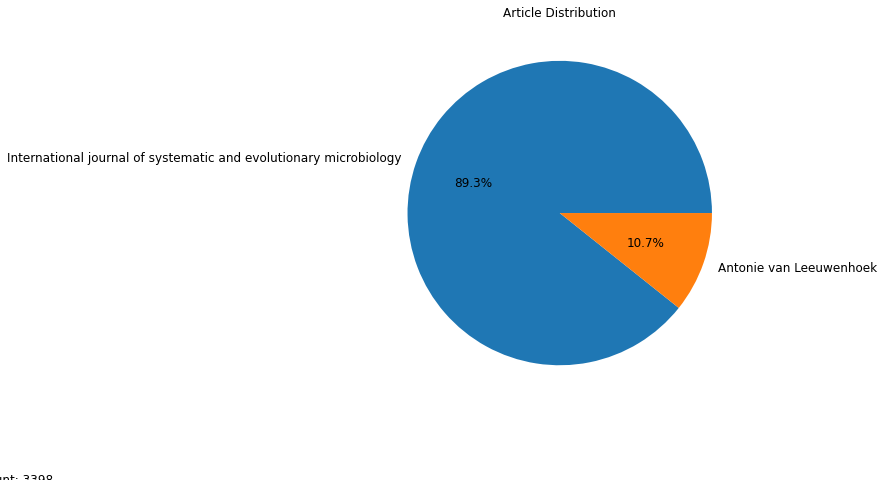

In [33]:
import matplotlib.pyplot as plt

# Create a pie plot of article distribution between journals
journal_counts = df["Journal Name"].value_counts()
journal_labels = journal_counts.index.tolist()  # Get journal names as a list

plt.figure(figsize=(7, 7))
plt.pie(journal_counts, labels=journal_labels, autopct="%1.1f%%", textprops={"fontsize": 12})

# Add annotations
total_count = journal_counts.sum()
annotation = f"Total Count: {total_count}"
plt.annotate(annotation, xy=(.5, .5), xytext=(0, 0), textcoords="figure fraction",
             fontsize=12, ha="center", va="center")

plt.title("Article Distribution")
plt.show();


Figure shows distribution of positive articles matches between two journals, Antonie van Leeuwenhoek and International journal of systematic and evolutionary microbiology. 

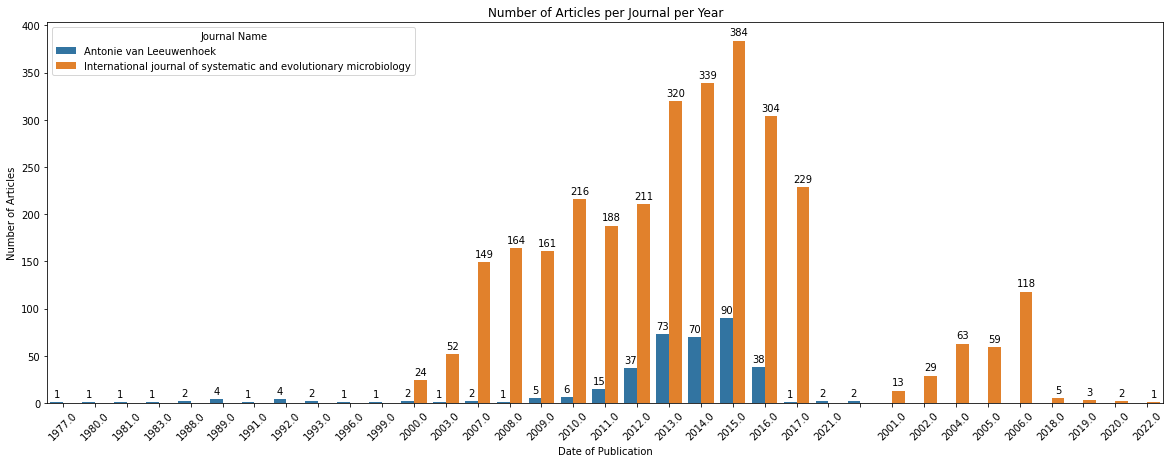

In [34]:
import seaborn as sns

df_count = df.groupby(['Journal Name', 'Year']).size().reset_index(name='Count')
df["Year"] = pd.to_numeric(df["Year"])

plt.figure(figsize=(20, 7))
ax = sns.barplot(data=df_count, x='Year', y='Count', hue='Journal Name')

plt.title('Number of Articles per Journal per Year')
plt.ylabel('Number of Articles')
plt.xlabel('Date of Publication')
plt.legend(title='Journal Name', loc= 'upper left')
plt.xticks(rotation=45)

# Add text annotations to each bar
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.show();

Figure shows articles published in two journals over years 

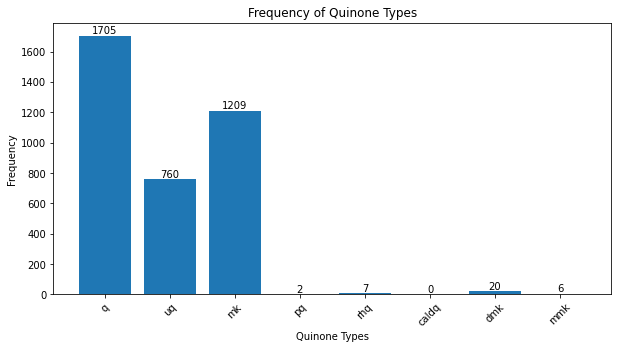

In [35]:
# determine frequency of occurrence of each type of quinone in data set using dictionary key, such as "q", "uq", "mq", etc.

quinone_counts = {}
# for each type of quinone
for qtype, patterns in quinones.items():
    count = 0
    # for each pattern
    for pattern in patterns:
        # for each entry in Quinone column of dataframe
        for entry in df["Quinone"]:
            # if pattern matches entry, increment count
            if re.search(pattern, str(entry)):
                count += 1
    quinone_counts[qtype] = count

# convert dictionary to a pandas Series for easy plotting
quinone_counts_series = pd.Series(quinone_counts)

plt.figure(figsize=(10, 5))
plt.bar(quinone_counts_series.index, quinone_counts_series)
plt.xlabel("Quinone Types")
plt.ylabel("Frequency")
plt.title("Frequency of Quinone Types")
plt.xticks(rotation=45)

# Add labels on top of each bar
for i, v in enumerate(quinone_counts_series):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show();

# look for patterns or trends in data that might indicate a relationship between length of quinone tail and species or genus of organism.
# create visualizations to better understand and communicate these patterns or relationships.
# based on these patterns or relationships, make predictions about types of quinones that might be found in other species or genus.
# use these predictions to guide further research or data collection.

Figure shows number  of matches grouped by each dictionary key. 'q' - Quninone, 'uq' - Ubiquinone, 'mk' - menaquinone, 'pq' plastoquinone, 'rhq' - rhodoquinone, 'dmk' - demethyl-menaquinone, and 'mmk' - methyl-menaquinone.

In [36]:
#plot taxonomy - # classify taxonomy of organisms based on species and genus names extracted.

# identify and analyze type and characteristics of quinones found in each species or genus.
# identify relationships between types of quinones found and species or genus of organisms.

# using 'Species and Genus' information, you can classify organisms according to their taxonomy 
# link organisms to quinones
organism_quinone_dict = df.set_index('Species and Genus')['Quinone'].to_dict()

# understand quinone structure: information about type of quinone and length of quinone tail can be used to study structural diversity of quinones across different organisms.

In [37]:
# #Heatmap for co-occurrence of matched keywords and quinones in same abstracts

# co_occurrence_matrix = pd.crosstab(df['Taxonomy'], df['Quinone'])
# plt.figure(figsize=(12, 6))
# sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='viridis')
# plt.title('Co-occurrence of Matched Keywords and Quinones in Same Abstracts')
# plt.ylabel('Taxonomy')
# plt.xlabel('Quinone')
# plt.show()

## Taxonomy

In [38]:
# create a new dataframe with results
df.to_csv('csv/results.csv', index=False)
df = pd.read_csv('csv/results.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398 entries, 0 to 3397
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Journal Name         3398 non-null   object 
 1   Year                 3396 non-null   float64
 2   Month                3387 non-null   object 
 3   PubMedID             3398 non-null   int64  
 4   Title                3398 non-null   object 
 5   Abstract             3398 non-null   object 
 6   Quinone              3398 non-null   object 
 7   Keyword Sentence     3398 non-null   object 
 8   Species and Genus    3389 non-null   object 
 9   Tail                 3398 non-null   object 
 10  Hydrogen Saturation  687 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 292.1+ KB


In [39]:
from ete3 import NCBITaxa
from anytree import NodeMixin, RenderTree

class TaxonomyNode(NodeMixin):
    def __init__(self, name):
        super(TaxonomyNode, self).__init__()
        self.name = name

ncbi = NCBITaxa()

def classify_taxonomy(names):
    if isinstance(names, str):
        taxonomy_data = []
        for name in names.split(','):
            search = ncbi.get_name_translator([name.strip()])
            if search:
                lineage = ncbi.get_lineage(search[name.strip()][0])
                names = ncbi.get_taxid_translator(lineage)
                ranks = ncbi.get_rank(names.keys())
                lineage_data = {}
                for id, rank in ranks.items():
                    if rank in ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']:
                        lineage_data[rank] = names[id]
                taxonomy_data.append(lineage_data)
        return taxonomy_data if taxonomy_data else None
    else:
        return None

# build a visual taxonomy tree for species and genus
def visualize_taxonomy(taxonomy_list, output_file):
    if taxonomy_list is None:
        return

    root = TaxonomyNode('Root')

    for tax_dict in taxonomy_list:
        current_node = root
        for k, v in tax_dict.items():
            label = f"{k}: {v}"
            child_node = next((c for c in current_node.children if c.name == label), None)
            if child_node is None:
                child_node = TaxonomyNode(label)
                child_node.parent = current_node
            current_node = child_node

    for pre, _, node in RenderTree(root):
        output_file.write(f"{pre}{node.name}\n")

# builds an output file 
def build_tax_output_file(df, output_file_location):
    with open(output_file_location, "w+") as outputFile:
        for count, (index, row) in enumerate(df.iterrows(), start=1):
            outputFile.write(f"{count}. Journal: {row['Journal Name']}\n\tPubMedID: {row['PubMedID']}\n\tSpecies and Genus: {row['Species and Genus']}\n\tTaxonomy: {row['Taxonomy']}\n\tQuinone Found: {row['Quinone']}\n\t{row['Keyword Sentence']}\n\tQuinone Tail: {row['Tail']}\n\tHydrogen Saturation: {row['Hydrogen Saturation']}\n\n")
            taxonomy_list = row['Taxonomy']
            if isinstance(taxonomy_list, str):
                try:
                    taxonomy_list = ast.literal_eval(taxonomy_list)
                except (SyntaxError, ValueError):
                    taxonomy_list = []
            if isinstance(taxonomy_list, list):
                outputFile.write("Taxonomy Tree:\n")
                visualize_taxonomy(taxonomy_list, outputFile)
                outputFile.write("\n")
            outputFile.write("\n")

df = pd.read_csv('csv/results.csv')
df['Taxonomy'] = df['Species and Genus'].apply(classify_taxonomy)
df.info()
build_tax_output_file(df, 'quinoneResults/taxonomy.txt')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398 entries, 0 to 3397
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Journal Name         3398 non-null   object 
 1   Year                 3396 non-null   float64
 2   Month                3387 non-null   object 
 3   PubMedID             3398 non-null   int64  
 4   Title                3398 non-null   object 
 5   Abstract             3398 non-null   object 
 6   Quinone              3398 non-null   object 
 7   Keyword Sentence     3398 non-null   object 
 8   Species and Genus    3389 non-null   object 
 9   Tail                 3398 non-null   object 
 10  Hydrogen Saturation  687 non-null    object 
 11  Taxonomy             3339 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 318.7+ KB


In [40]:
# create a new dataframe with information taxonmy information from NCBI database and concat it with df we have
df.to_csv('csv/results.csv', index=False)
df = pd.read_csv('csv/results.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398 entries, 0 to 3397
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Journal Name         3398 non-null   object 
 1   Year                 3396 non-null   float64
 2   Month                3387 non-null   object 
 3   PubMedID             3398 non-null   int64  
 4   Title                3398 non-null   object 
 5   Abstract             3398 non-null   object 
 6   Quinone              3398 non-null   object 
 7   Keyword Sentence     3398 non-null   object 
 8   Species and Genus    3389 non-null   object 
 9   Tail                 3398 non-null   object 
 10  Hydrogen Saturation  687 non-null    object 
 11  Taxonomy             3339 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 318.7+ KB


,Journal Name,Year,Month,PubMedID,Title,Abstract,Quinone,Keyword Sentence,Species and Genus,Tail,Hydrogen Saturation,Taxonomy
0,Antonie van Leeuwenhoek,2017.0,Jun,28265787,Isolation and characterisation of an enterocin...,Screening for lactic acid bacteria (LAB) from ...,"'q': (Q1, Q1, Q1, Q1, Q1)",Screening for lactic acid bacteria (LAB) from ...,"Isolation and, Enterococcus lactis, Penaeus va...","[1, 1, 1, 1, 1]",NaN,"[{'phylum': 'Bacillota', 'genus': 'Enterococcu..."
1,International journal of systematic and evolut...,2013.0,Jul,23178721,"Pseudomonas sagittaria sp. nov., a siderophore...","An aerobic, Gram-stain-negative, rod-shaped ba...","'q': (quinone, Q-9), 'uq': (ubiquinone)",The predominant quinone system of strain CC-OP...,Pseudomonas sagittaria,[9],NaN,"[{'genus': 'Pseudomonas', 'phylum': 'Pseudomon..."
2,International journal of systematic and evolut...,2013.0,Jun,23178724,"Roseomonas aerophila sp. nov., isolated from air.","An aerobic, Gram-stain-negative, motile, mesop...","'q': (Q-10), 'uq': (ubiquinone)",Strain 7515T-07(T) contained Q-10 as the ubiqu...,Roseomonas aerophila,[10],NaN,"[{'family': 'Acetobacteraceae', 'phylum': 'Pse..."
3,International journal of systematic and evolut...,2013.0,Jun,23178726,"Glaciimonas singularis sp. nov., isolated from...","A bacterial strain, A2-57(T), recovered from a...","'q': (quinone), 'uq': (Ubiquinone, Ubiquinone ...",Ubiquinone 8 (UQ-8) was the predominant respir...,Glaciimonas singularis,"[8, 8]",NaN,"[{'phylum': 'Pseudomonadota', 'class': 'Betapr..."
4,International journal of systematic and evolut...,2013.0,Jul,23178729,"Micromonospora sonneratiae sp. nov., isolated ...","A novel endophytic actinomycete, strain 274745...","'mk': (menaquinone, MK-10)",The predominant menaquinone was MK-10(H8) and ...,"Micromonospora sonneratiae, Sonneratia apetala",[10],['H8'],"[{'class': 'Actinomycetes', 'genus': 'Micromon..."


In [41]:
# build_tax_output_file(df[df['Taxonomy'].isna()], 'quinoneResults/noTax.txt')

In [42]:
# # Outline for Report
# ## Biological Context (~2 pages)
# Importance of quinones
# Limited distribution of quinones
# Microbiologists interest in quinones
# Use of quinones as indicators of growth conditions and taxonomic markers
# Linking specific quinones to specific species

# ## State of Art (~1 page)
# Significance of current work in relation to previous research (highlighting gap since 1981 paper)
# Identification of undiscovered information in journals

# ## TIMC Motivations
# Exploration of quinone biosynthesis pathways, respiratory chains, and substrate preferences
# Investigation of organism growth and colonization conditions

# # Computational (3-4 pages)
# Objective: Extract uncollected quinone data, validate journals, and update knowledge with new discoveries

# ## Mining
# XML to DataFrame conversion
# Explanation of computation time, file sizes, and number of files
# Ideas for code parallelization, unecessary as we only need to run it once

# ## Analysis
# Extraction of information from titles and abstracts
# Improvements to dictionary used
# Utilization of libraries such as NLTK and ETE3
# Matching quinones using tokens and multiple regex patterns
# Extraction of specific keywords, e.g., hydrogen saturation (distribution and validation)

# ## Visualizations for Validation
# Output files displaying quinone information and taxonomy tree of species and genus
# Simple visualizations of data distribution completed so far
# Exploration of alternative ways to explore data with taxonomy information
# Discussion of difficulties encountered during debugging process
# Present taxonomy tree 



In [43]:
# compare taxonomy at a higher heirarchy
# bacteria, other organism most likely host
# keep info of hosts? host column


# genome taxonomy database - gtdb
# ete3 function for gtdb

# plot new taxonomy over years, examples no tax
# group at tax level and and compare quinone types and tail lengths: class level -> distribution (final results)
# compare to validate results
# try to crossvalidate if time allows

## Statistics
# description
# confirmational
# biological 

In [44]:

# plot new taxonomy over years, examples no tax
# group at tax level and and compare quinone types and tail lengths: class level -> distribution (final results)

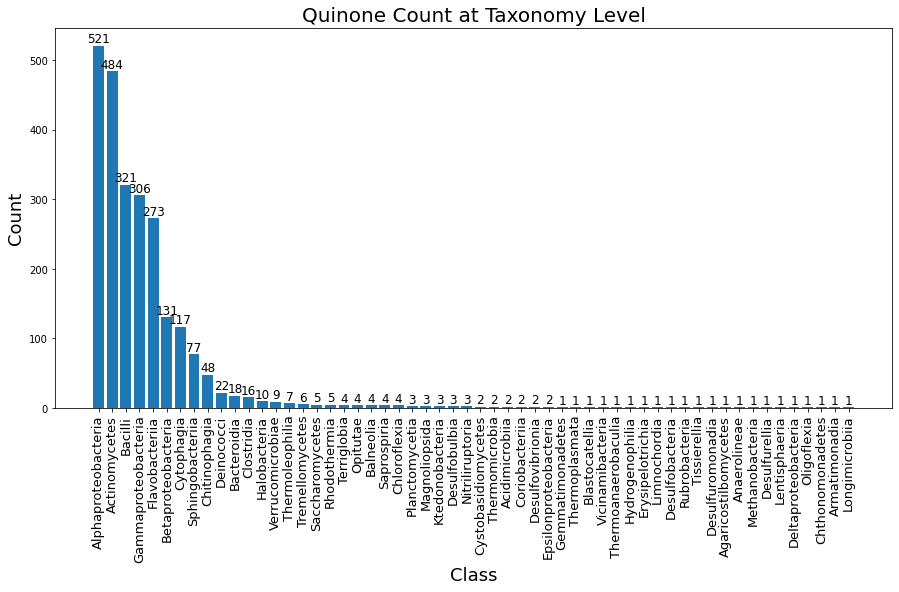

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('csv/results.csv')

# function to classify quinone type
def classify_quinone(quinone_str):
    full_length_names = {
        "q": "quinone",
        "uq": "ubiquinone",
        "mk": "menaquinone",
        "pq": "plastoquinone",
        "rhq": "rhodoquinone",
        "caldq": "caldariella quinone",
        "dmk": "demethylmenaquinone",
        "mmk": "methylmenaquinone",
    }
    quinone_types = quinone_str.lower().split(', ')
    for quinone_type in quinone_types:
        for key in full_length_names:
            if key in quinone_type:
                if key == 'q':
                    continue
                return full_length_names[key]
    return "quinone"

df['Quinone Type'] = df['Quinone'].apply(classify_quinone)

# function to extract a specific taxonomy level
def extract_taxonomy_level(taxonomy_list, level):
    for taxonomy_dict in taxonomy_list:
        if level in taxonomy_dict:
            return taxonomy_dict[level]
    return None

# define desired taxonomy level
taxonomy_level = 'class'

# filter rows with missing taxonomy
df_filtered = df.dropna(subset=['Taxonomy'])

# filter out rows with multiple tail lengths
df_filtered = df_filtered[~df_filtered['Tail'].str.contains(',')]

# extract desired taxonomy level for each row
df_filtered['Taxonomy Level'] = df_filtered['Taxonomy'].apply(lambda x: extract_taxonomy_level(eval(x), taxonomy_level))

# remove rows with missing taxonomy level
df_filtered = df_filtered.dropna(subset=['Taxonomy'])

quinone_tails = df_filtered['Taxonomy Level'].value_counts()

plt.figure(figsize=(15, 7))
plt.bar(quinone_tails.index, quinone_tails.values)
plt.xlabel(f'{taxonomy_level.capitalize()}', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Quinone Count at Taxonomy Level', fontsize=20)
plt.xticks(rotation=90, fontsize=13)

# add text annotations to each bar
for i, v in enumerate(quinone_tails.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.show();






figure displays a bar chart titled "Quinone Tails by Taxonomy Level" representing distribution of different quinone tails based on taxonomy level of organisms. x-axis denotes taxonomy level, specifically "class" level, and y-axis represents count of quinone tails.

chart reveals variation in quinone tails within different taxonomic classes. Each bar corresponds to a specific quinone tail, and its height represents count of occurrences in dataset. This visualization helps to comprehend distribution of quinone tails across taxonomic classes, providing insights into diversity and prevalence of quinone types within different organisms.

In [46]:
# create a new dataframe with information taxonmy information from NCBI database and concat it with df we have
# final filtered results with removed missing taxonomy, one tail length as well as added column for quinone types
new_columns = ['Journal Name', 'Year', 'Month', 'PubMedID', 'Title', 'Species and Genus', 'Abstract', 'Keyword Sentence', 'Quinone Type', 'Quinone', 'Tail', 'Hydrogen Saturation', 'Taxonomy']
df = df.reindex(columns=new_columns)
df = df.dropna(subset=['Taxonomy']) # drop rows missing taxonomy
#df = df[~df['Tail'].str.contains(',')] # drop rows with multiple tail lengths
df.to_csv('csv/results.csv', index=False)
df = pd.read_csv('csv/results.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Journal Name         3339 non-null   object 
 1   Year                 3338 non-null   float64
 2   Month                3333 non-null   object 
 3   PubMedID             3339 non-null   int64  
 4   Title                3339 non-null   object 
 5   Species and Genus    3339 non-null   object 
 6   Abstract             3339 non-null   object 
 7   Keyword Sentence     3339 non-null   object 
 8   Quinone Type         3339 non-null   object 
 9   Quinone              3339 non-null   object 
 10  Tail                 3339 non-null   object 
 11  Hydrogen Saturation  677 non-null    object 
 12  Taxonomy             3339 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 339.2+ KB


,Journal Name,Year,Month,PubMedID,Title,Species and Genus,Abstract,Keyword Sentence,Quinone Type,Quinone,Tail,Hydrogen Saturation,Taxonomy
0,Antonie van Leeuwenhoek,2017.0,Jun,28265787,Isolation and characterisation of an enterocin...,"Isolation and, Enterococcus lactis, Penaeus va...",Screening for lactic acid bacteria (LAB) from ...,Screening for lactic acid bacteria (LAB) from ...,quinone,"'q': (Q1, Q1, Q1, Q1, Q1)","[1, 1, 1, 1, 1]",NaN,"[{'phylum': 'Bacillota', 'genus': 'Enterococcu..."
1,International journal of systematic and evolut...,2013.0,Jul,23178721,"Pseudomonas sagittaria sp. nov., a siderophore...",Pseudomonas sagittaria,"An aerobic, Gram-stain-negative, rod-shaped ba...",The predominant quinone system of strain CC-OP...,ubiquinone,"'q': (quinone, Q-9), 'uq': (ubiquinone)",[9],NaN,"[{'genus': 'Pseudomonas', 'phylum': 'Pseudomon..."
2,International journal of systematic and evolut...,2013.0,Jun,23178724,"Roseomonas aerophila sp. nov., isolated from air.",Roseomonas aerophila,"An aerobic, Gram-stain-negative, motile, mesop...",Strain 7515T-07(T) contained Q-10 as the ubiqu...,ubiquinone,"'q': (Q-10), 'uq': (ubiquinone)",[10],NaN,"[{'family': 'Acetobacteraceae', 'phylum': 'Pse..."
3,International journal of systematic and evolut...,2013.0,Jun,23178726,"Glaciimonas singularis sp. nov., isolated from...",Glaciimonas singularis,"A bacterial strain, A2-57(T), recovered from a...",Ubiquinone 8 (UQ-8) was the predominant respir...,ubiquinone,"'q': (quinone), 'uq': (Ubiquinone, Ubiquinone ...","[8, 8]",NaN,"[{'phylum': 'Pseudomonadota', 'class': 'Betapr..."
4,International journal of systematic and evolut...,2013.0,Jul,23178729,"Micromonospora sonneratiae sp. nov., isolated ...","Micromonospora sonneratiae, Sonneratia apetala","A novel endophytic actinomycete, strain 274745...",The predominant menaquinone was MK-10(H8) and ...,menaquinone,"'mk': (menaquinone, MK-10)",[10],['H8'],"[{'class': 'Actinomycetes', 'genus': 'Micromon..."


In [47]:
df['Journal Name'].value_counts()

International journal of systematic and evolutionary microbiology    2998
Antonie van Leeuwenhoek                                               341
Name: Journal Name, dtype: int64

In [48]:
import pandas as pd
df_output = pd.read_csv('csv/output.csv')
df_output.info()
df_output.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12219 entries, 0 to 12218
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Journal Name  12219 non-null  object 
 1   Year          12093 non-null  float64
 2   Month         11604 non-null  object 
 3   PubMedID      12219 non-null  int64  
 4   Title         12219 non-null  object 
 5   Abstract      12185 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 572.9+ KB


,Journal Name,Year,Month,PubMedID,Title,Abstract
0,Antonie van Leeuwenhoek,1989.0,Aug,2802573,Microscopic observations on the interaction of...,The mycoparasitic interactions of Verticillium...
1,Antonie van Leeuwenhoek,1989.0,Aug,2802574,Ester formation from ethanol by Candida pseudo...,"The production of ethanol, acetate ion and eth..."
2,Antonie van Leeuwenhoek,1989.0,Aug,2802575,Cloning and sequencing of the Clostridium perf...,Several gene banks of Clostridium perfringens ...
3,Antonie van Leeuwenhoek,1989.0,Aug,2802576,Adenine and pyridine nucleotide levels during ...,Concentrations of adenine and pyridine nucleot...
4,Antonie van Leeuwenhoek,2017.0,Jun,28251351,"Actinomadura alkaliterrae sp. nov., isolated f...",A polyphasic study was undertaken to establish...


In [49]:
df_output['Journal Name'].value_counts()

International journal of systematic and evolutionary microbiology    8950
Antonie van Leeuwenhoek                                              3269
Name: Journal Name, dtype: int64

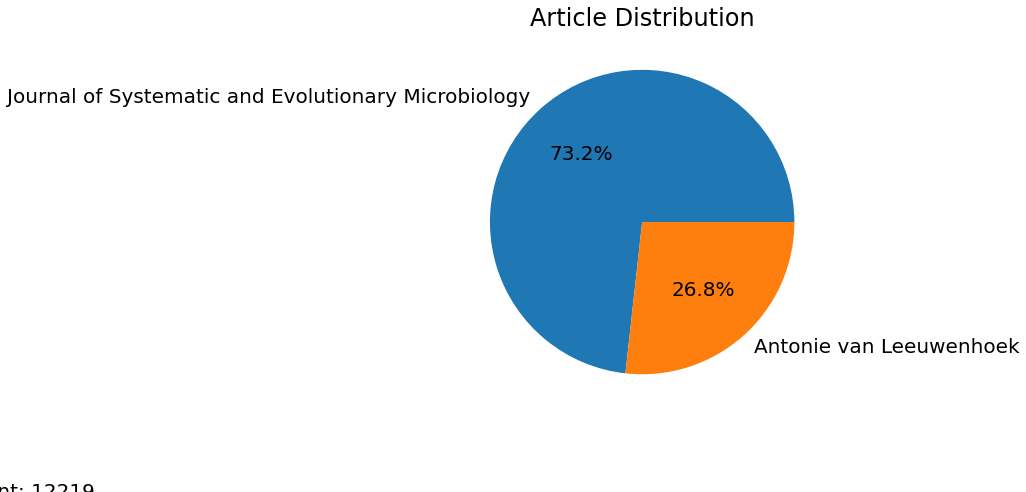

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("csv/output.csv")

# Create a pie plot of article distribution between journals
journal_counts = df["Journal Name"].value_counts()
journal_labels = journal_counts.index.tolist()  # Get journal names as a list

# Rename the labels
journal_labels = ["Journal of Systematic and Evolutionary Microbiology", "Antonie van Leeuwenhoek"]  # Add your desired labels here

plt.figure(figsize=(7, 7))
plt.pie(journal_counts, labels=journal_labels, autopct="%1.1f%%", textprops={"fontsize": 20})  # Increase the font size

# Add annotations
total_count = journal_counts.sum()
annotation = f"Total Count: {total_count}"
plt.annotate(annotation, xy=(.5, .5), xytext=(0, 0), textcoords="figure fraction",
             fontsize=20, ha="center", va="center")  # Increase the font size

plt.title("Article Distribution", fontsize=24)  # Increase the font size
plt.show();
